In [57]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rc
import os
import itertools
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [58]:
from lib import metrics

### Plot validation MAE

In [130]:
n2vDic = {}
n2vDic['1205151426'] = '2-0.1'
n2vDic['1205193503'] = '2-0.3'
n2vDic['1205222715'] = '2-1.0'
n2vDic['1206001839'] = '2-3.0'
n2vDic['1206021132'] = '2-10.0'
n2vDic['1206042511'] = '6-0.1'
n2vDic['1206065403'] = '6-0.3'
n2vDic['1206084953'] = '6-1.0'
n2vDic['1206142145'] = '6-3.0'
n2vDic['1206180629'] = '6-10.0'
n2vDic['1206204147'] = '14-0.1'
n2vDic['1206230359'] = '14-0.3'
n2vDic['1207071608'] = '14-1.0'
n2vDic['1207082625'] = '14-3.0'
n2vDic['1207091256'] = '14-10.0'
n2vDic['1207100245'] = '30-0.1'
n2vDic['1207105506'] = '30-0.3'
n2vDic['1207121908'] = '30-1.0'
n2vDic['1207130719'] = '30-3.0'
n2vDic['1207141023'] = '30-10.0'
n2vDic['1207150829'] = '62-0.1'
n2vDic['1207161355'] = '62-0.3'
n2vDic['1207201556'] = '62-1.0'
n2vDic['1207215657'] = '62-3.0'
n2vDic['1207230442'] = '62-10.0'

sdneDic = {}
sdneDic['1206094844'] = '6-1'
sdneDic['1206142027'] = '6-10'
sdneDic['1206180508'] = '6-100'
sdneDic['1206202750'] = '14-1'
sdneDic['1206230203'] = '14-10'
sdneDic['1207130528'] = '14-100'
sdneDic['1207130548'] = '30-1'
sdneDic['1207130608'] = '30-10'
sdneDic['1207130628'] = '30-100'
sdneDic['1207160111'] = '62-1'
sdneDic['1207160131'] = '62-10'
sdneDic['1207160151'] = '62-100'

In [131]:
keep_phrases = ["val_mae"]

In [132]:
epochs = []
fcc_baseline = './data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_64_1107230603/info.log'
with open(fcc_baseline) as f:
    for line in f:
        for phrase in keep_phrases:
            if phrase in line:
                epochs.append(line)
                break
fcc_baseline = []
for epoch in epochs:
    index = epoch.find("val_mae")
    fcc_baseline.append(float(epoch[index+9 : index + 14]))

In [266]:
epochs = []
dcrnn = '../DCRNN/data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_64_1108092636/info.log'
with open(dcrnn) as f:
    for line in f:
        for phrase in keep_phrases:
            if phrase in line:
                epochs.append(line)
                break
dcrnn = []
for epoch in epochs:
    index = epoch.find("val_mae")
    dcrnn.append(float(epoch[index+9 : index + 14]))

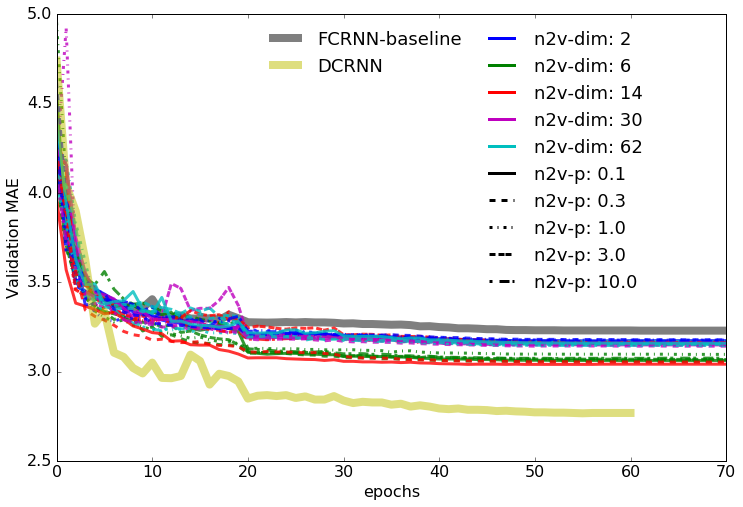

In [244]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()  # set up the 2nd axis
#plt.figure(figsize=(12,8))
ax1.plot(fcc_baseline, label = 'FCRNN-baseline', color='k', linewidth = 8, alpha=0.5)
ax2.plot(dcrnn, label = 'DCRNN', color='y', linewidth = 8, alpha=0.5)

colMap = {}
colMap['2'] = 'b'
colMap['6'] = 'g'
colMap['14'] = 'r'
colMap['30'] = 'm'
colMap['62'] = 'c'

lineMap = {}
lineMap['0.1'] = '-'
lineMap['0.3'] = '--'
lineMap['1.0'] = '-.'
lineMap['3.0'] = ':'
lineMap['10.0'] = ':'

plot_lines = []

rootdir = './data/model/'
count = 0
lwd = 3
alp = 0.8
for subdir, dirs, files in os.walk(rootdir):
    if len(subdir) > 50 and subdir[-10:] in n2vDic.keys():
        label = n2vDic[subdir[-10:]]
        colLabel = label.split('-')[0]
        lineLabel = label.split('-')[1]
        plt.hold(True)
        # print(subdir)
        epochs = []
        with open(subdir+'/info.log') as f:
            for line in f:
                for phrase in keep_phrases:
                    if phrase in line:
                        epochs.append(line)
                        break
        fcrnn = []
        for epoch in epochs:
            index = epoch.find("val_mae")
            fcrnn.append(float(epoch[index+9 : index + 14]))
        # print(lineMap[lineLabel])
        # print(colMap[colLabel])
        if lineLabel != '10.0' and lineLabel != '3.0':
            line, = ax1.plot(fcrnn, lineMap[lineLabel], color=colMap[colLabel], linewidth=lwd, alpha=alp)
        elif lineLabel == '10.0':
            line, = ax1.plot(fcrnn, dashes=[3,7,10,3], color=colMap[colLabel],linewidth=lwd, alpha=alp)
        else:
            line, = ax1.plot(fcrnn, dashes=[6,3,6,1], color=colMap[colLabel],linewidth=lwd, alpha=alp)
        # plot_lines.append([line])

# legend1 = plt.legend([l for l in plot_lines], ['n2v-dim=2','n2v-dim=6','n2v-dim=14','n2v-dim=30','n2v-dim=62'], 
#                      bbox_to_anchor=(0.45, 0.5, 0.5, 0.5))
# plt.legend([l[0] for l in plot_lines], [0.1, 0.3, 1.0, 3.0, 10.0], 
#            bbox_to_anchor=(0.3, 0.5, 0.5, 0.5))
# plt.gca().add_artist(legend1)

element1 = [Line2D([0], [0], linestyle='-', linewidth=8, alpha=0.5,color='k', label='FCRNN-baseline'),
            Line2D([0], [0], linestyle='-', linewidth=8, alpha=0.5,color='y', label='DCRNN')]
element2 = [Line2D([0], [0], linestyle='-', linewidth=lwd, color='b', label='n2v-dim: 2'),
            Line2D([0], [0], linestyle='-', linewidth=lwd, color='g', label='n2v-dim: 6'),
            Line2D([0], [0], linestyle='-', linewidth=lwd, color='r', label='n2v-dim: 14'),
            Line2D([0], [0], linestyle='-', linewidth=lwd, color='m', label='n2v-dim: 30'),
            Line2D([0], [0], linestyle='-', linewidth=lwd, color='c', label='n2v-dim: 62'),
            Line2D([0], [0], linestyle='-', linewidth=lwd, color='k', label='n2v-p: 0.1'),
            Line2D([0], [0], linestyle='--', linewidth=lwd, color='k', label='n2v-p: 0.3'),
            Line2D([0], [0], linestyle='-.', linewidth=lwd, color='k', label='n2v-p: 1.0'),
            Line2D([0], [0], dashes=[6,3,6,1], linewidth=lwd, color='k', label='n2v-p: 3.0'),
            Line2D([0], [0], dashes=[3,7,10,3], linewidth=lwd, color='k', label='n2v-p: 10.0')]

# Create the figure
# ax.legend(handles=legend_elements, loc='center')
ax1.set_ylabel(r'Validation MAE', fontsize=16)
ax1.set_xlabel(r'epochs', fontsize=16)
ax1.tick_params(labelsize=16)
ax1.tick_params(labelsize=16)
ax1.set_xlim(0,70)
ax1.set_ylim(2.5, 5.0)
ax2.get_yaxis().set_visible(False)
ax1.legend(handles=element1, bbox_to_anchor=(0.13, 0.5, 0.5, 0.5), frameon=False, fontsize=18)
ax2.legend(handles=element2, bbox_to_anchor=(0.4, 0.5, 0.5, 0.5), frameon=False, fontsize=18)
plt.show()

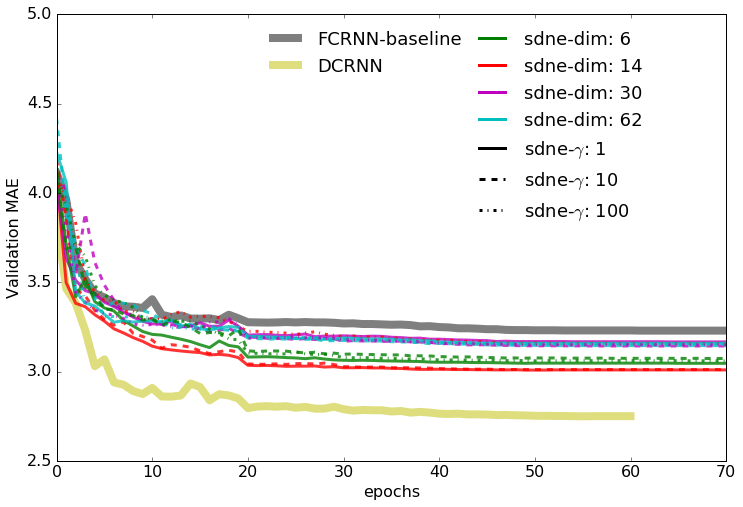

In [245]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.plot(fcc_baseline, label = 'FCRNN-baseline', color='k', linewidth = 8, alpha=0.5)
ax1.plot(dcrnn, label = 'DCRNN', color='y', linewidth = 8, alpha=0.5)

colMap = {}
colMap['2'] = 'b'
colMap['6'] = 'g'
colMap['14'] = 'r'
colMap['30'] = 'm'
colMap['62'] = 'c'

lineMap = {}
lineMap['1'] = '-'
lineMap['10'] = '--'
lineMap['100'] = '-.'
plot_lines = []

rootdir = './data/model/'
count = 0
lwd = 3
alp = 0.8
for subdir, dirs, files in os.walk(rootdir):
    if len(subdir) > 50 and subdir[-10:] in sdneDic.keys():
        label = sdneDic[subdir[-10:]]
        colLabel = label.split('-')[0]
        lineLabel = label.split('-')[1]
        plt.hold(True)
        # print(subdir)
        epochs = []
        with open(subdir+'/info.log') as f:
            for line in f:
                for phrase in keep_phrases:
                    if phrase in line:
                        epochs.append(line)
                        break
        fcrnn = []
        for epoch in epochs:
            index = epoch.find("val_mae")
            fcrnn.append(float(epoch[index+9 : index + 14]))
        # print(lineMap[lineLabel])
        # print(colMap[colLabel])
        line, = ax1.plot(fcrnn, lineMap[lineLabel], color=colMap[colLabel], linewidth=lwd, alpha=alp)
        # plot_lines.append([line])

# legend1 = plt.legend([l for l in plot_lines], ['n2v-dim=2','n2v-dim=6','n2v-dim=14','n2v-dim=30','n2v-dim=62'], 
#                      bbox_to_anchor=(0.45, 0.5, 0.5, 0.5))
# plt.legend([l[0] for l in plot_lines], [0.1, 0.3, 1.0, 3.0, 10.0], 
#            bbox_to_anchor=(0.3, 0.5, 0.5, 0.5))
# plt.gca().add_artist(legend1)

element1 = [Line2D([0], [0], linestyle='-', linewidth=8, alpha=0.5,color='k', label='FCRNN-baseline'),
            Line2D([0], [0], linestyle='-', linewidth=8, alpha=0.5,color='y', label='DCRNN')]

element2 = [Line2D([0], [0], linestyle='-', linewidth=lwd, color='g', label='sdne-dim: 6'),
            Line2D([0], [0], linestyle='-', linewidth=lwd, color='r', label='sdne-dim: 14'),
            Line2D([0], [0], linestyle='-', linewidth=lwd, color='m', label='sdne-dim: 30'),
            Line2D([0], [0], linestyle='-', linewidth=lwd, color='c', label='sdne-dim: 62'),
            Line2D([0], [0], linestyle='-', linewidth=lwd, color='k', label=r'sdne-$\gamma$: 1'),
            Line2D([0], [0], linestyle='--', linewidth=lwd, color='k', label='sdne-$\gamma$: 10'),
            Line2D([0], [0], linestyle='-.', linewidth=lwd, color='k', label='sdne-$\gamma$: 100')]

# Create the figure
# ax.legend(handles=legend_elements, loc='center')
ax1.set_ylabel(r'Validation MAE', fontsize=16)
ax1.set_xlabel(r'epochs', fontsize=16)
ax1.tick_params(labelsize=16)
ax1.tick_params(labelsize=16)
ax1.set_xlim(0,70)
ax1.set_ylim(2.5, 5.0)
ax2.get_yaxis().set_visible(False)
ax1.legend(handles=element1, bbox_to_anchor=(0.13, 0.5, 0.5, 0.5), frameon=False, fontsize=18)
ax2.legend(handles=element2, bbox_to_anchor=(0.4, 0.5, 0.5, 0.5), frameon=False, fontsize=18)
plt.show()

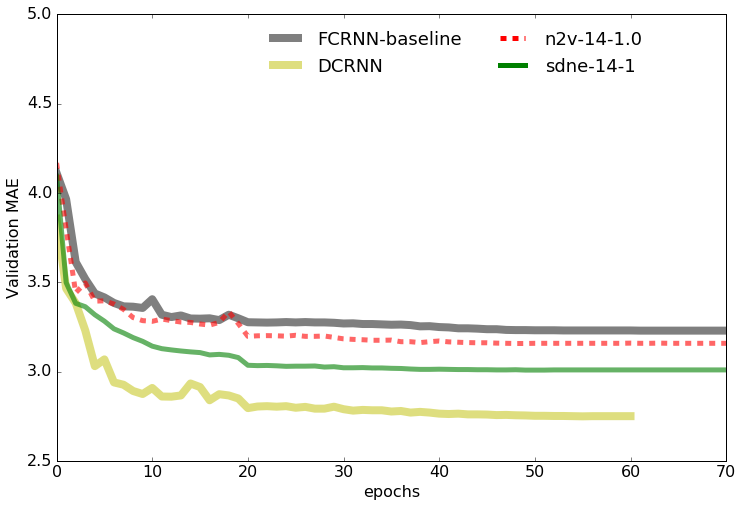

In [270]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()  # set up the 2nd axis
ax1.plot(fcc_baseline, label = 'FCRNN-baseline', color='k', linewidth = 8, alpha=0.5)
ax1.plot(dcrnn, label = 'DCRNN', color='y', linewidth = 8, alpha=0.5)


plot_lines = []

rootdir = './data/model/'
count = 0
lwd = 5
alp = 0.6
for subdir, dirs, files in os.walk(rootdir):
    colMap = {}
    colMap['14'] = 'r'
    lineMap = {}
    lineMap['1.0'] = '--'
    if len(subdir) > 50 and subdir[-10:] in n2vDic.keys():
        label = n2vDic[subdir[-10:]]
        colLabel = label.split('-')[0]
        lineLabel = label.split('-')[1]
        plt.hold(True)
        # print(subdir)
        epochs = []
        with open(subdir+'/info.log') as f:
            for line in f:
                for phrase in keep_phrases:
                    if phrase in line:
                        epochs.append(line)
                        break
        fcrnn = []
        for epoch in epochs:
            index = epoch.find("val_mae")
            fcrnn.append(float(epoch[index+9 : index + 14]))
        # print(lineMap[lineLabel])
        # print(colMap[colLabel])
        if colLabel == '14':
            if lineLabel == '1.0':
                line, = ax1.plot(fcrnn, lineMap[lineLabel], color=colMap[colLabel], linewidth=lwd, alpha=alp)
            plot_lines.append([line])
    
    colMap = {}
    colMap['14'] = 'green'
    lineMap = {}
    lineMap['1'] = '-'
    if len(subdir) > 50 and subdir[-10:] in sdneDic.keys():
        label = sdneDic[subdir[-10:]]
        colLabel = label.split('-')[0]
        lineLabel = label.split('-')[1]
        plt.hold(True)
        # print(subdir)
        epochs = []
        with open(subdir+'/info.log') as f:
            for line in f:
                for phrase in keep_phrases:
                    if phrase in line:
                        epochs.append(line)
                        break
        fcrnn = []
        for epoch in epochs:
            index = epoch.find("val_mae")
            fcrnn.append(float(epoch[index+9 : index + 14]))
        # print(lineMap[lineLabel])
        # print(colMap[colLabel])
        if colLabel == '14':
            if lineLabel == '1':
                line, = ax1.plot(fcrnn, lineMap[lineLabel], color=colMap[colLabel], linewidth=lwd, alpha=alp)
                plot_lines.append([line])

# legend1 = plt.legend([l for l in plot_lines], ['n2v-dim=2','n2v-dim=6','n2v-dim=14','n2v-dim=30','n2v-dim=62'], 
#                      bbox_to_anchor=(0.45, 0.5, 0.5, 0.5))
# plt.legend([l[0] for l in plot_lines], [0.1, 0.3, 1.0, 3.0, 10.0], 
#            bbox_to_anchor=(0.3, 0.5, 0.5, 0.5))
# plt.gca().add_artist(legend1)

element1 = [Line2D([0], [0], linestyle='-', linewidth=8, alpha=0.5,color='k', label='FCRNN-baseline'),
            Line2D([0], [0], linestyle='-', linewidth=8, alpha=0.5,color='y', label='DCRNN')]

element2 = [Line2D([0], [0], linestyle='--', linewidth=lwd, color='r', label='n2v-14-1.0'),
            Line2D([0], [0], linestyle='-', linewidth=lwd, color='g', label=r'sdne-14-1'),]

# Create the figure
# ax.legend(handles=legend_elements, loc='center')
ax1.set_ylabel(r'Validation MAE', fontsize=16)
ax1.set_xlabel(r'epochs', fontsize=16)
ax1.tick_params(labelsize=16)
ax1.tick_params(labelsize=16)
ax1.set_xlim(0,70)
ax1.set_ylim(2.5, 5.0)
ax2.get_yaxis().set_visible(False)
ax1.legend(handles=element1, bbox_to_anchor=(0.13, 0.5, 0.5, 0.5), frameon=False, fontsize=18)
ax2.legend(handles=element2, bbox_to_anchor=(0.4, 0.5, 0.5, 0.5), frameon=False, fontsize=18)
plt.show()

### Calculate test metrics

#### Create the predictions with trained model

Note, before running this commandline, you need to **comment out** Line 183 of *dcrnn_cell.py* 

In [ ]:
! python run_demo.py --config_filename './data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_64_1107230603/config_100.yaml' --output_filename 'fcrnn-simple.npz'

Note, before running this commandline, you need to **comment in** Line 183 of *dcrnn_cell.py* 

In [ ]:
! python run_demo.py --config_filename './data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_64_1108040246/config_99.yaml' --output_filename 'fcrnn-n2v.npz'

#### Calculate the metrics
Actually the metrics are already calculated for us.

##### Without **node2vec**

2018-11-08 01:55:01,827 - model.dcrnn_supervisor - INFO - Horizon 01, MAE: 2.37, MAPE: 0.0580, RMSE: 4.19<br>
2018-11-08 01:55:01,922 - model.dcrnn_supervisor - INFO - Horizon 02, MAE: 2.73, MAPE: 0.0699, RMSE: 5.22<br>
**2018-11-08 01:55:02,024 - model.dcrnn_supervisor - INFO - Horizon 03, MAE: 2.99, MAPE: 0.0793, RMSE: 5.91**<br>
2018-11-08 01:55:02,113 - model.dcrnn_supervisor - INFO - Horizon 04, MAE: 3.21, MAPE: 0.0878, RMSE: 6.45<br>
2018-11-08 01:55:02,200 - model.dcrnn_supervisor - INFO - Horizon 05, MAE: 3.41, MAPE: 0.0954, RMSE: 6.90<br>
**2018-11-08 01:55:02,292 - model.dcrnn_supervisor - INFO - Horizon 06, MAE: 3.60, MAPE: 0.1026, RMSE: 7.30**<br>
2018-11-08 01:55:02,375 - model.dcrnn_supervisor - INFO - Horizon 07, MAE: 3.77, MAPE: 0.1094, RMSE: 7.66<br>
2018-11-08 01:55:02,460 - model.dcrnn_supervisor - INFO - Horizon 08, MAE: 3.93, MAPE: 0.1158, RMSE: 7.98<br>
2018-11-08 01:55:02,544 - model.dcrnn_supervisor - INFO - Horizon 09, MAE: 4.07, MAPE: 0.1218, RMSE: 8.26<br>
2018-11-08 01:55:02,629 - model.dcrnn_supervisor - INFO - Horizon 10, MAE: 4.21, MAPE: 0.1275, RMSE: 8.52<br>
2018-11-08 01:55:02,713 - model.dcrnn_supervisor - INFO - Horizon 11, MAE: 4.34, MAPE: 0.1329, RMSE: 8.76<br>
**2018-11-08 01:55:02,797 - model.dcrnn_supervisor - INFO - Horizon 12, MAE: 4.47, MAPE: 0.1383, RMSE: 8.99**<br>

##### n2v-best-dim=14-p=0.1

2018-12-06 22:33:15,682 - model.dcrnn_supervisor - INFO - Horizon 01, MAE: 2.33, MAPE: 0.0571, RMSE: 4.12<br>
2018-12-06 22:33:15,746 - model.dcrnn_supervisor - INFO - Horizon 02, MAE: 2.65, MAPE: 0.0682, RMSE: 5.09<br>
**2018-12-06 22:33:15,810 - model.dcrnn_supervisor - INFO - Horizon 03, MAE: 2.87, MAPE: 0.0766, RMSE: 5.72**<br>
2018-12-06 22:33:15,881 - model.dcrnn_supervisor - INFO - Horizon 04, MAE: 3.06, MAPE: 0.0839, RMSE: 6.21<br>
2018-12-06 22:33:15,958 - model.dcrnn_supervisor - INFO - Horizon 05, MAE: 3.22, MAPE: 0.0904, RMSE: 6.62<br>
**2018-12-06 22:33:16,041 - model.dcrnn_supervisor - INFO - Horizon 06, MAE: 3.36, MAPE: 0.0962, RMSE: 6.96**<br>
2018-12-06 22:33:16,124 - model.dcrnn_supervisor - INFO - Horizon 07, MAE: 3.48, MAPE: 0.1013, RMSE: 7.25<br>
2018-12-06 22:33:16,204 - model.dcrnn_supervisor - INFO - Horizon 08, MAE: 3.58, MAPE: 0.1058, RMSE: 7.51<br>
2018-12-06 22:33:16,284 - model.dcrnn_supervisor - INFO - Horizon 09, MAE: 3.68, MAPE: 0.1098, RMSE: 7.73<br>
2018-12-06 22:33:16,364 - model.dcrnn_supervisor - INFO - Horizon 10, MAE: 3.77, MAPE: 0.1134, RMSE: 7.92<br>
2018-12-06 22:33:16,443 - model.dcrnn_supervisor - INFO - Horizon 11, MAE: 3.85, MAPE: 0.1168, RMSE: 8.11<br>
**2018-12-06 22:33:16,525 - model.dcrnn_supervisor - INFO - Horizon 12, MAE: 3.93, MAPE: 0.1201, RMSE: 8.28**<br>

##### n2v-best-sdne-dim=14-gamma=1

2018-12-06 22:17:37,299 - model.dcrnn_supervisor - INFO - Horizon 01, MAE: 2.32, MAPE: 0.0571, RMSE: 4.11<br>
2018-12-06 22:17:37,378 - model.dcrnn_supervisor - INFO - Horizon 02, MAE: 2.64, MAPE: 0.0682, RMSE: 5.07<br>
**2018-12-06 22:17:37,459 - model.dcrnn_supervisor - INFO - Horizon 03, MAE: 2.86, MAPE: 0.0765, RMSE: 5.71**<br>
2018-12-06 22:17:37,544 - model.dcrnn_supervisor - INFO - Horizon 04, MAE: 3.04, MAPE: 0.0837, RMSE: 6.19<br>
2018-12-06 22:17:37,630 - model.dcrnn_supervisor - INFO - Horizon 05, MAE: 3.19, MAPE: 0.0899, RMSE: 6.59<br>
**2018-12-06 22:17:37,713 - model.dcrnn_supervisor - INFO - Horizon 06, MAE: 3.32, MAPE: 0.0954, RMSE: 6.93**<br>
2018-12-06 22:17:37,796 - model.dcrnn_supervisor - INFO - Horizon 07, MAE: 3.43, MAPE: 0.1002, RMSE: 7.22<br>
2018-12-06 22:17:37,883 - model.dcrnn_supervisor - INFO - Horizon 08, MAE: 3.54, MAPE: 0.1046, RMSE: 7.47<br>
2018-12-06 22:17:37,967 - model.dcrnn_supervisor - INFO - Horizon 09, MAE: 3.62, MAPE: 0.1083, RMSE: 7.69<br>
2018-12-06 22:17:38,048 - model.dcrnn_supervisor - INFO - Horizon 10, MAE: 3.71, MAPE: 0.1118, RMSE: 7.88<br>
2018-12-06 22:17:38,135 - model.dcrnn_supervisor - INFO - Horizon 11, MAE: 3.79, MAPE: 0.1151, RMSE: 8.06<br>
**2018-12-06 22:17:38,224 - model.dcrnn_supervisor - INFO - Horizon 12, MAE: 3.87, MAPE: 0.1183, RMSE: 8.23**<br>

**Worse than both DCRNN and GCRNN (difussion convolution with ChevNet)**

##### Plot error comparison

In [255]:
dcrnn = (2.77, 3.15, 3.60)
fcc_n2v = (2.87, 3.36, 3.93)
fcc_sdne = (2.86, 3.32, 3.87)
fcc = (2.99, 3.60, 4.47)

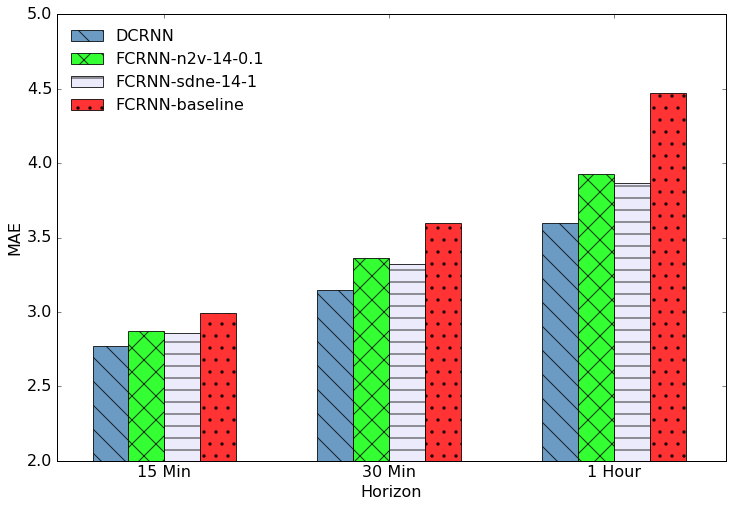

In [263]:
plt.figure(figsize=(12,8))
bar_width = 0.16
plt.bar(np.arange(3)+bar_width, dcrnn, bar_width, alpha = 0.8, label=r'DCRNN', color = 'steelblue', hatch='\\')
plt.bar(np.arange(3)+2*bar_width, fcc_n2v, bar_width, alpha = 0.8, label=r'FCRNN-n2v-14-0.1', color = 'lime', hatch='x')
plt.bar(np.arange(3)+3*bar_width, fcc_sdne, bar_width, alpha = 0.8, label=r'FCRNN-sdne-14-1', color = 'lavender', hatch='-')
plt.bar(np.arange(3)+4*bar_width, fcc, bar_width, alpha = 0.8, label=r'FCRNN-baseline', color = 'red', hatch='.')
plt.xlim(0, 2.5+3*bar_width)
plt.ylim(2.0, 5)
plt.xlabel('Horizon', fontsize=16)
plt.ylabel('MAE', fontsize=16)
plt.xticks(np.arange(3) + 3*bar_width, ('15 Min', '30 Min', '1 Hour'))
plt.legend(loc = 'best', frameon=False, fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

Originally want to ask the following questions, but later found taht the metrics have already been calculated by the ***run_demo.py***.
+ Why there is so huge a discrepancy between Validation error and test error?
+ How did the author deal with the MAPE devision by 0?
<br>

In [251]:
fcrnn_simple = np.load('fcrnn-simple.npz')
assert fcrnn_simple['predictions'].shape == fcrnn_simple['groundtruth'].shape
print(fcrnn_simple['predictions'].shape)

fcrnn_n2v = np.load('fcrnn-n2v.npz')
assert fcrnn_n2v['predictions'].shape == fcrnn_n2v['groundtruth'].shape
print(fcrnn_n2v['predictions'].shape)

fcrnn_sdne = np.load('fcrnn-sdne.npz')
assert fcrnn_sdne['predictions'].shape == fcrnn_sdne['groundtruth'].shape
print(fcrnn_sdne['predictions'].shape)

dcrnn = np.load('../DCRNN/dcrnn.npz')
assert dcrnn['predictions'].shape == dcrnn['groundtruth'].shape
print(dcrnn['predictions'].shape)

(12, 6850, 207)
(12, 6850, 207)
(12, 6850, 207)
(12, 6850, 207)


### Plot a true data and its prediction

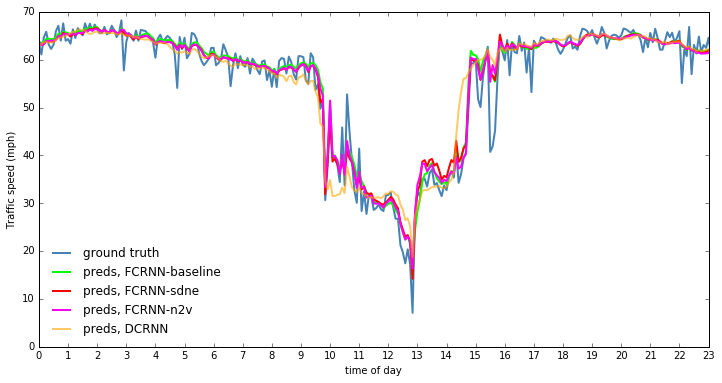

In [253]:
# 2012-03-14
plt.figure(figsize=(12, 6))
day = int(24*60/5)
start_time = 2*day
end_time = start_time + day
sensor = 6
iD = 0
lag = 4
plt.plot(fcrnn_n2v['groundtruth'][3,start_time:end_time, sensor], label = 'ground truth', color = 'steelblue',linewidth=2.0)
plt.plot(fcrnn_simple['predictions'][3,(start_time+lag):(end_time+lag), sensor], label = 'preds, FCRNN-baseline', color = 'lime', linewidth=2.0)
plt.plot(fcrnn_sdne['predictions'][3,(start_time+lag):(end_time+lag), sensor], label = 'preds, FCRNN-sdne', color = 'red',linewidth=2.0)
plt.plot(fcrnn_n2v['predictions'][3,(start_time+lag):(end_time+lag), sensor], label = 'preds, FCRNN-n2v', color = 'magenta',linewidth=2.0)
plt.plot(dcrnn['predictions'][3,(start_time+lag):(end_time+lag), sensor], label = 'preds, DCRNN', color = 'orange',linewidth=2.0, alpha=0.6)
plt.legend(loc = 'best', frameon=False)
plt.ylabel('Traffic speed (mph)')
plt.xticks(np.arange(0, 288, step=12), np.arange(0, 24))
plt.xlim(0, 23*12)
plt.xlabel('time of day')
plt.show()

### Plot training time comparison

#### DCRNN

In [85]:
keep_phrases = ['lr:']
epochs = []
dcrnn = './data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_64_1108092636/info.log'
with open(dcrnn) as f:
    for line in f:
        for phrase in keep_phrases:
            if phrase in line:
                epochs.append(line)
                break
dcrnn_time = []
for epoch in epochs:
    index = epoch.find(keep_phrases[0])
    dcrnn_time.append(float(epoch[index+12:-2]))

In [89]:
epochs = []
fcrnn_n2v = './data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_64_1206204147/info.log'
with open(fcrnn_n2v) as f:
    for line in f:
        for phrase in keep_phrases:
            if phrase in line:
                epochs.append(line)
                break
fcrnn_n2v_t = []
for epoch in epochs:
    index = epoch.find(keep_phrases[0])
    fcrnn_n2v_t.append(float(epoch[index+12:-2]))

In [90]:
epochs = []
fcrnn_sdne = './data/model/dcrnn_DR_2_h_12_64-64_lr_0.01_bs_64_1206202750/info.log'
with open(fcrnn_sdne) as f:
    for line in f:
        for phrase in keep_phrases:
            if phrase in line:
                epochs.append(line)
                break
fcrnn_sdne_t = []
for epoch in epochs:
    index = epoch.find(keep_phrases[0])
    fcrnn_sdne_t.append(float(epoch[index+12:-2]))

In [220]:
# labels = [item.get_text() for item in ax1.get_xticklabels()]
# ax1.set_xticklabels(labels)

colMap = {}
colMap['2'] = 'b'
colMap['6'] = 'g'
colMap['14'] = 'r'
colMap['30'] = 'm'
colMap['62'] = 'c'

n2v_time = {}
sdne_time = {}
n2v_time['2'] = []
n2v_time['6'] = []
n2v_time['14'] = []
n2v_time['30'] = []
n2v_time['62'] = []

sdne_time['6'] = []
sdne_time['14'] = []
sdne_time['30'] = []
sdne_time['62'] = []

counter = {}
counter['2']=0
counter['6']=0
counter['14']=0
counter['30']=0
counter['62']=0

rootdir = './data/model/'
count = 0
lwd = 3
alp = 0.8
keep_phrases = ['lr:']
for subdir, dirs, files in os.walk(rootdir):
    if len(subdir) > 50 and subdir[-10:] in n2vDic.keys():
        label = n2vDic[subdir[-10:]]
        colLabel = label.split('-')[0]
#         if colLabel == '6':
#             print(subdir)
#         counter[colLabel] += 1
        
        epochs = []
        with open(subdir+'/info.log') as f:
            for line in f:
                for phrase in keep_phrases:
                    if phrase in line:
                        epochs.append(line)
                        break

        for epoch in epochs:
            index = epoch.find(keep_phrases[0])
            if float(colLabel) > 14:
                n2v_time[colLabel].append(float(epoch[index+12:-2])*2.5)
            elif int(colLabel) == 14 and float(label.split('-')[1]) > 0.1:
                if float(epoch[index+12:-2]) < 50:
                    n2v_time[colLabel].append(float(epoch[index+12:-2])*2.5)
                else: 
                    n2v_time[colLabel].append(float(epoch[index+12:-2]))
            else:
                n2v_time[colLabel].append(float(epoch[index+12:-2]))
    
    if len(subdir) > 50 and subdir[-10:] in sdneDic.keys():
        label = sdneDic[subdir[-10:]]
        colLabel = label.split('-')[0]
#         if colLabel == '6':
#             print(subdir)
#         counter[colLabel] += 1
        
        epochs = []
        with open(subdir+'/info.log') as f:
            for line in f:
                for phrase in keep_phrases:
                    if phrase in line:
                        epochs.append(line)
                        break

        for epoch in epochs:
            index = epoch.find(keep_phrases[0])
            sdne_time[colLabel].append(float(epoch[index+12:-2]))


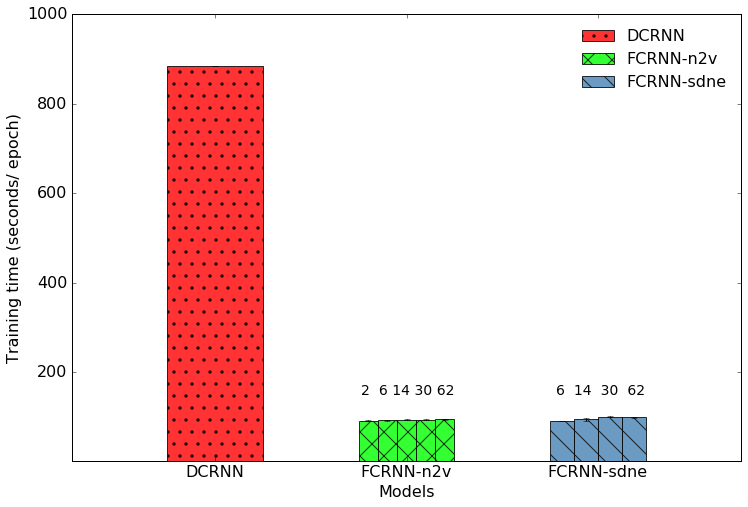

In [242]:
plt.subplots(figsize=(12,8))

bar_width = 0.5
plt.bar(1, np.mean(dcrnn_time), bar_width, alpha = 0.8, label='DCRNN',
       yerr=np.std(dcrnn_time), ecolor='black', color = 'red', hatch='.')

dimList = ['2', '6', '14', '30', '62']
# plt.text(2.01, 150, '2  6 14 30 62', fontsize=14)
for i in range(len(dimList)):
    # plt.text(2+bar_width*i/5+bar_width/5/6, 160, dimList[i], fontsize=14)
    if i ==0:
        plt.bar(2+bar_width*i/5, np.mean(n2v_time[dimList[i]]), bar_width/5, alpha = 0.8, label='FCRNN-n2v', 
                yerr=np.std(n2v_time[dimList[i]]), ecolor = 'black', color = 'lime', hatch='x')
    else:
        plt.bar(2+bar_width*i/5, np.mean(n2v_time[dimList[i]]), bar_width/5, alpha = 0.8, 
                yerr=np.std(n2v_time[dimList[i]]), ecolor = 'black', color = 'lime', hatch='x')

dimList = ['6', '14', '30', '62']
# plt.text(3.03, 150, '6  14  30  62', fontsize=14)
for i in range(len(dimList)):
    # plt.text(3+bar_width*i/4+bar_width/4/5, 200, dimList[i], fontsize=14)
    if i == 0:
        plt.bar(3+bar_width*i/4, np.mean(sdne_time[dimList[i]]), bar_width/4, alpha = 0.8, label='FCRNN-sdne', 
                yerr=np.std(sdne_time[dimList[i]]), ecolor = 'black', color = 'steelblue', hatch='\\')
    else:
        plt.bar(3+bar_width*i/4, np.mean(sdne_time[dimList[i]]), bar_width/4, alpha = 0.8, 
                yerr=np.std(sdne_time[dimList[i]]), ecolor = 'black', color = 'steelblue', hatch='\\')


plt.xlim(0.5, 4)
plt.ylim(2.0, 1000)
plt.xlabel(r'Models', fontsize=16)
plt.ylabel(r'Training time (seconds/ epoch)', fontsize=16)
plt.xticks([1.25, 2.25, 3.25], ['DCRNN', 'FCRNN-n2v', 'FCRNN-sdne'])
plt.tick_params(labelsize=16)
plt.tick_params(labelsize=16)
plt.legend(loc = 'best', frameon=False,fontsize=16)
plt.show()